# PYTHON PROJECT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
dataset_url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(dataset_url)

In [8]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

In [10]:
# Display column names and first few rows
print("Column Names:", df.columns)
print("Initial Data:")
print(df.head())

Column Names: Index(['name', 'team', 'number', 'position', 'age', 'height', 'weight',
       'college', 'salary'],
      dtype='object')
Initial Data:
            name            team  number position  age  height  weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             college     salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [12]:
# Preprocessing: Replace "height" column with random values between 150 and 180
if 'height' in df.columns:
    df['height'] = np.random.randint(150, 181, size=len(df))
else:
    print("Warning: 'height' column not found in the dataset.")

In [14]:
# Analysis Task 1: Distribution of employees across teams
if 'team' in df.columns:
    team_counts = df['team'].value_counts()
    team_percentage = (team_counts / len(df)) * 100
else:
    print("Error: 'team' column not found.")
    team_counts = pd.Series()
    team_percentage = pd.Series()

C:\Users\athir\AppData\Local\Temp\ipykernel_28272\151856340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')


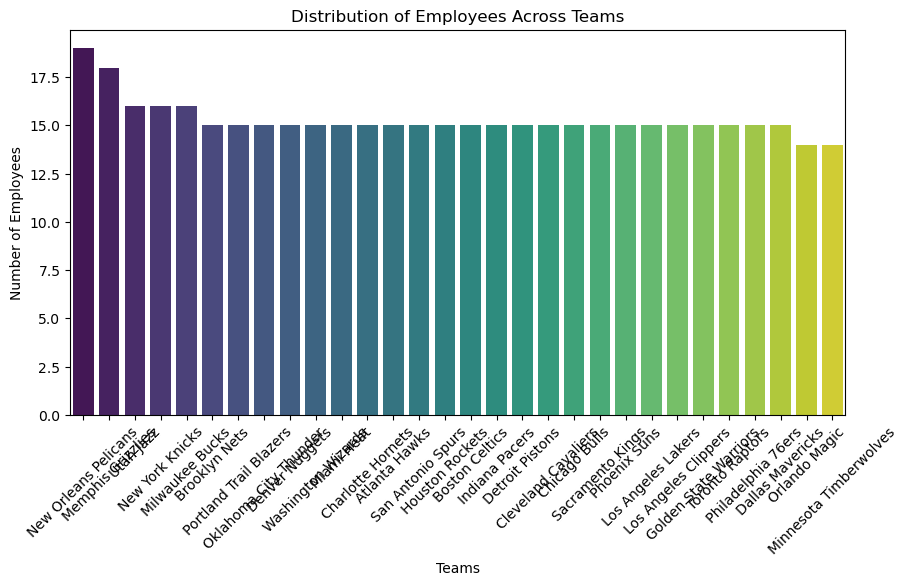

In [16]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees Across Teams")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Analysis Task 2: Segregate employees based on their positions
if 'position' in df.columns:
    position_counts = df['position'].value_counts()
else:
    print("Error: 'position' column not found.")
    position_counts = pd.Series()

C:\Users\athir\AppData\Local\Temp\ipykernel_28272\3937106609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette='coolwarm')


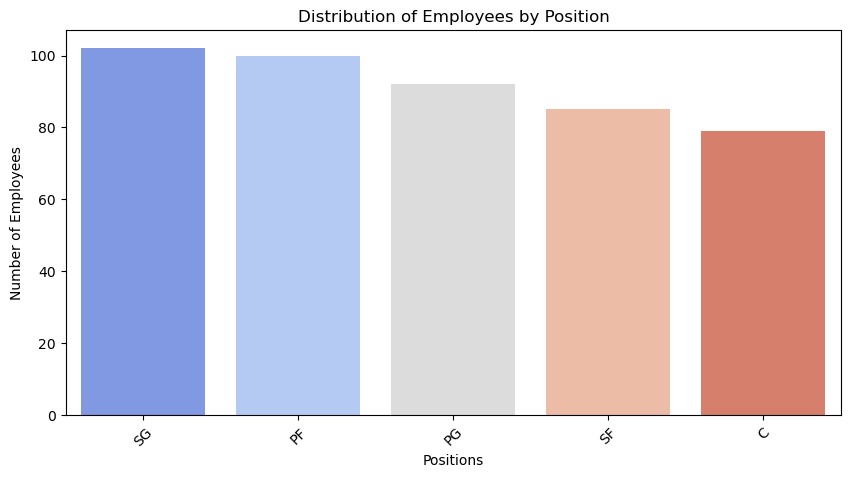

In [20]:
# Visualization
if not position_counts.empty:
    plt.figure(figsize=(10,5))
    sns.barplot(x=position_counts.index, y=position_counts.values, palette='coolwarm')
    plt.xlabel("Positions")
    plt.ylabel("Number of Employees")
    plt.title("Distribution of Employees by Position")
    plt.xticks(rotation=45)
    plt.show()

In [24]:
# Analysis Task 3: Identify predominant age group
if 'age' in df.columns:
    age_bins = [18, 25, 35, 45, 55, 65]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
    age_distribution = df['age_group'].value_counts()
else:
    print("Error: 'age' column not found.")
    age_distribution = pd.Series(dtype=int)

C:\Users\athir\AppData\Local\Temp\ipykernel_28272\2602835879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='magma')


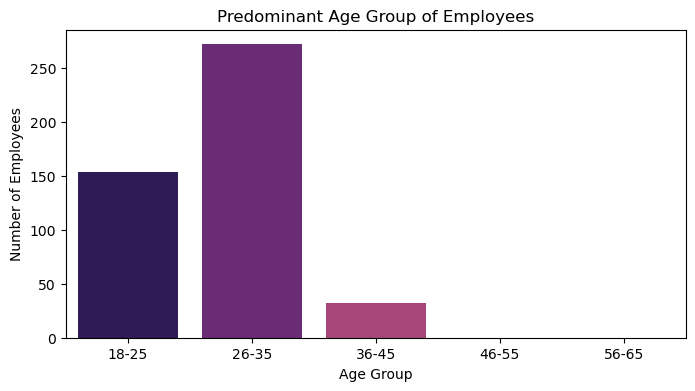

In [26]:
# Visualization
if not age_distribution.empty:
    plt.figure(figsize=(8,4))
    sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='magma')
    plt.xlabel("Age Group")
    plt.ylabel("Number of Employees")
    plt.title("Predominant Age Group of Employees")
    plt.show()

In [28]:
# Analysis Task 4: Highest salary expenditure by team and position
if 'salary' in df.columns and 'team' in df.columns and 'position' in df.columns:
    salary_by_team = df.groupby('team')['salary'].sum().sort_values(ascending=False)
    salary_by_position = df.groupby('position')['salary'].sum().sort_values(ascending=False)
else:
    print("Error: Missing columns for salary analysis.")
    salary_by_team = pd.Series(dtype=float)
    salary_by_position = pd.Series(dtype=float)

C:\Users\athir\AppData\Local\Temp\ipykernel_28272\1794843855.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='Blues', ax=axes[0])
C:\Users\athir\AppData\Local\Temp\ipykernel_28272\1794843855.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(salary_by_team.index, rotation=45)
C:\Users\athir\AppData\Local\Temp\ipykernel_28272\1794843855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_position.index, y=salary_by_position.values, palette='Greens', ax=axes[1])
C:\Users\athir\AppData\Local\Temp\ipykernel_28272\1

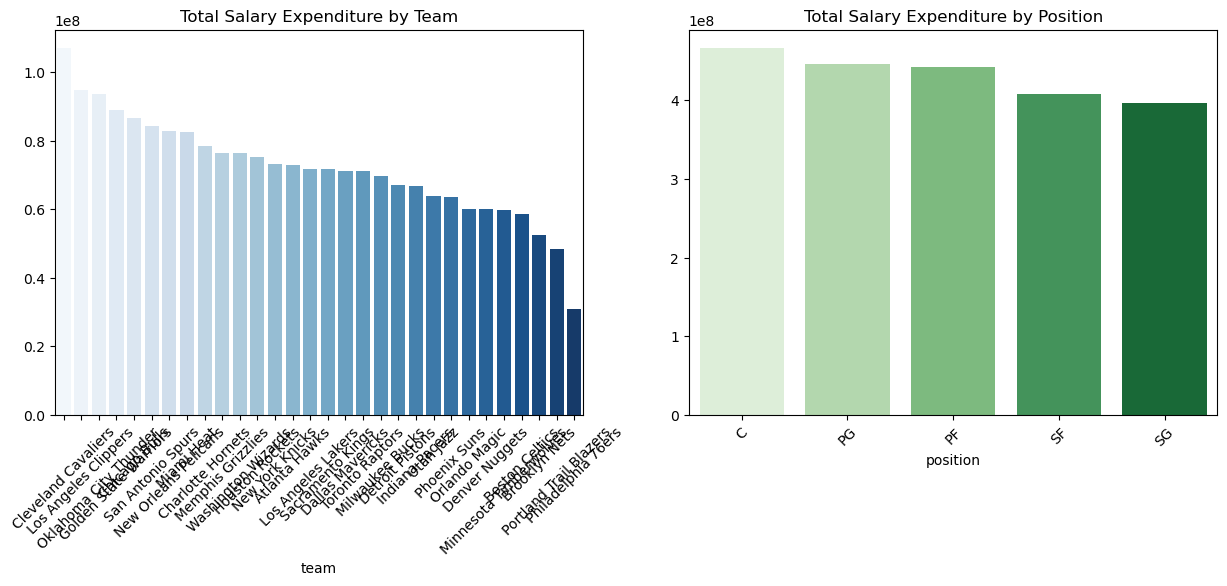

In [30]:
# Visualization
if not salary_by_team.empty and not salary_by_position.empty:
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='Blues', ax=axes[0])
    axes[0].set_title("Total Salary Expenditure by Team")
    axes[0].set_xticklabels(salary_by_team.index, rotation=45)

    sns.barplot(x=salary_by_position.index, y=salary_by_position.values, palette='Greens', ax=axes[1])
    axes[1].set_title("Total Salary Expenditure by Position")
    axes[1].set_xticklabels(salary_by_position.index, rotation=45)
    plt.show()

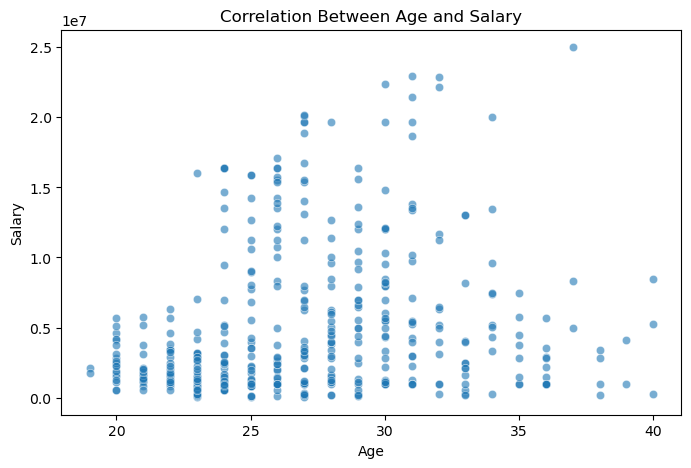

In [34]:
# Analysis Task 5: Correlation between age and salary
if 'age' in df.columns and 'salary' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df['age'], y=df['salary'], alpha=0.6)
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.title("Correlation Between Age and Salary")
    plt.show()
else:
    print("Error: Missing columns for correlation analysis.")

In [36]:
# Data Story / Insights
print("\nData Story / Key Insights:")
if not team_counts.empty:
    print(f"1. Most employees work in the '{team_counts.idxmax()}' team, forming {team_percentage.max():.2f}% of the workforce.")
if not position_counts.empty:
    print(f"2. The most common position is '{position_counts.idxmax()}' with {position_counts.max()} employees.")
if not age_distribution.empty:
    print(f"3. The predominant age group is '{age_distribution.idxmax()}' with {age_distribution.max()} employees.")
if not salary_by_team.empty:
    print(f"4. The '{salary_by_team.idxmax()}' team has the highest total salary expenditure.")
if not salary_by_position.empty:
    print(f"5. The '{salary_by_position.idxmax()}' position contributes most to salary expenditure.")
print("6. The scatter plot shows the relationship between age and salary — further analysis can reveal if there's a trend.")


Data Story / Key Insights:
1. Most employees work in the 'New Orleans Pelicans' team, forming 4.15% of the workforce.
2. The most common position is 'SG' with 102 employees.
3. The predominant age group is '26-35' with 272 employees.
4. The 'Cleveland Cavaliers' team has the highest total salary expenditure.
5. The 'C' position contributes most to salary expenditure.
6. The scatter plot shows the relationship between age and salary — further analysis can reveal if there's a trend.
